<a href="https://colab.research.google.com/github/Joe-hyper/DSW9C/blob/main/Python_Notebook_IP_Week_9_Core_(Titanic_train_and_test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Defining the question**

### a) Specifying the question
      Predict whether a passenger in the Titanic survived or not.

### b) Defining the metric for success
      Build a model that accurately predicts whether a passenger in the Titanic survived or not.

### c) Understanding the context
      Titanic had departed from Southampton on 10 April 1912, then stopped at Cherbourg, France, and Queenstown (now Cobh), Ireland, before heading west towards New York.[9] On 14 April, four days into the crossing and about 375 miles (600 km) south of Newfoundland, she hit an iceberg at 11:40 pm ship's time. The collision caused the hull plates to buckle inwards along her starboard (right) side and laid five of her sixteen watertight compartments open to the sea; she had been designed to survive the flooding of up to four compartments. Some passengers and crew members were evacuated in lifeboats. A disproportionate number of men were left aboard because of a "women and children first" protocol for loading lifeboats, which was generally observed.

      At 2:20 am, the ship broke apart and foundered, with well over one thousand people still aboard. Just under two hours after Titanic sank, the Cunard liner RMS Carpathia arrived on the scene, and took on board an estimated 710 survivors.

### d) Recording the experimental design
      * Define the question, the metric for success, the context, experimental design taken.
      * Read and explore the given dataset.
      * Define the appropriateness of the available data to answer the given question.
      * Find and deal with outliers, anomalies, and missing data within the dataset.
      * Implement a K-nearest neighbor (kNN) classifier.
      * Split datasets i.e 70-30, 60-40, 80-20
      * Compute the accuracy (percentage of correct classification).  
      * Report the confusion matrix of each classifier.
      * Apply at least one of the optimization techniques that you learned earlier this week.
      * Provide further recommendations to improve both classifiers.

# **2. Importing Libraries**

In [5]:
# libraries needed
# other libraries might be added during anlysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline


# **3. Reading the Data**

In [6]:
# loading datasets (2)
# train df and test df
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **4. Checking the Data**

In [7]:
# shape of data
print(traindf.shape)
print(testdf.shape)

(891, 12)
(418, 11)


In [8]:
# lets check the info of the dataset
traindf.info()
testdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [9]:
# finding out the data types in our column
print(traindf.dtypes)
print(testdf.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [10]:
# statistical summary of dataset
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **5. Tidying the Data**

In [11]:
# In this section we will find any anomalies, missing, duplicate data within our dataset and any other pre-processing activities.

In [12]:
# finding duplicate values in our dataset
print(traindf.duplicated())
print(testdf.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool


      We have no duplicate values in eithter dataset.

In [13]:
# lets find unique values in our dataset
# finding unique values can help us identify columns with anomalies 
traindf.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [14]:
# traindf
# removing white spaces, lowering case of all columns to achieve uniformity; replacing spaces
traindf.columns = traindf.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
# lets check the columns
traindf.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [15]:
# testdf
# removing white spaces, lowering case of all columns to achieve uniformity; replacing spaces
testdf.columns = testdf.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
# lets check the columns
testdf.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [16]:
# finding missing data within our values
print(traindf.isnull().sum())
print(testdf.isnull().sum())

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64
passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64


In [17]:
# traindf
# checking for missing values
# defining missing value function for traindf
def percent_missing(traindf):
  # ---------------------
  df = traindf

  missing = df.isnull().sum().sort_values(ascending=False)

  percent = (df.isnull().sum() / len(df)).sort_values(ascending=False) 

  missing_value_df = pd.DataFrame({'column_name': missing,
                                'percent_missing': percent})
  
  return missing_value_df

In [18]:
# calling out function
percent_missing(traindf)

,column_name,percent_missing
cabin,687,0.771044
age,177,0.198653
embarked,2,0.002245
passengerid,0,0.000000
survived,0,0.000000
pclass,0,0.000000
name,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000


      In our train dataset: Age column has around 19% of missing values.
                            Cabin column has around 70% of missing values.
                            Embarked column has 0.2245% of missing values.

In [19]:
# dealing with missing values in traindf
# cabin column has 70% of missing values\
# It automatically qualifies to be dropped
# We also dont need ticket, fare, name columns

In [20]:
# dropping ticket fare and name
traindf.drop(['ticket', 'fare', 'name', 'cabin'],axis=1, inplace=True)

In [21]:
# imputing age with mode
traindf['age'].fillna(traindf['age'].mode()[0], inplace=True)
traindf['age'].unique()

array([22.  , 38.  , 26.  , 35.  , 24.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [22]:
# dropping missing values in embarked column
traindf.dropna(subset=['embarked'])
traindf.dropna(inplace=True)
traindf

,passengerid,survived,pclass,sex,age,sibsp,parch,embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,S
887,888,1,1,female,19.0,0,0,S
888,889,0,3,female,24.0,1,2,S
889,890,1,1,male,26.0,0,0,C


In [23]:
# confirming no missing values exist in our traindf
traindf.isnull().sum()

passengerid    0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
embarked       0
dtype: int64

In [24]:
# testdf
# checking for missing values
# defining missing value function for traindf
def percent_missing(testdf):
  # ---------------------
  df1 = testdf

  missing = df1.isnull().sum().sort_values(ascending=False)

  percent = (df1.isnull().sum() / len(df1)).sort_values(ascending=False) 

  missing_value_df1 = pd.DataFrame({'column_name': missing,
                                'percent_missing': percent})
  
  return missing_value_df1

In [25]:
# calling out function
percent_missing(testdf)

,column_name,percent_missing
cabin,327,0.782297
age,86,0.205742
fare,1,0.002392
passengerid,0,0.000000
pclass,0,0.000000
name,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
ticket,0,0.000000


      In our train dataset: Age column has around 20% of missing values.
                            Cabin column has around 70% of missing values.
                            Fare column has 0.2245% of missing values.

In [26]:
# dropping ticket fare and name
testdf.drop(['ticket', 'fare', 'name', 'cabin'],axis=1, inplace=True)

In [27]:
# imputing age with mode
testdf['age'].fillna(testdf['age'].mode()[0], inplace=True)
testdf['age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  , 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,  9.  ,
       48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  , 60.  ,
       36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  , 29.  ,
       28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  , 16.  ,
        1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,  7.  ,
       15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33, 38.  ,
       57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,  0.17,
       59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [28]:
# confirming if there are any missing values
testdf.isnull().sum()

passengerid    0
pclass         0
sex            0
age            0
sibsp          0
parch          0
embarked       0
dtype: int64

      We can now confirm that we dont have any missing values in both train and test datasets

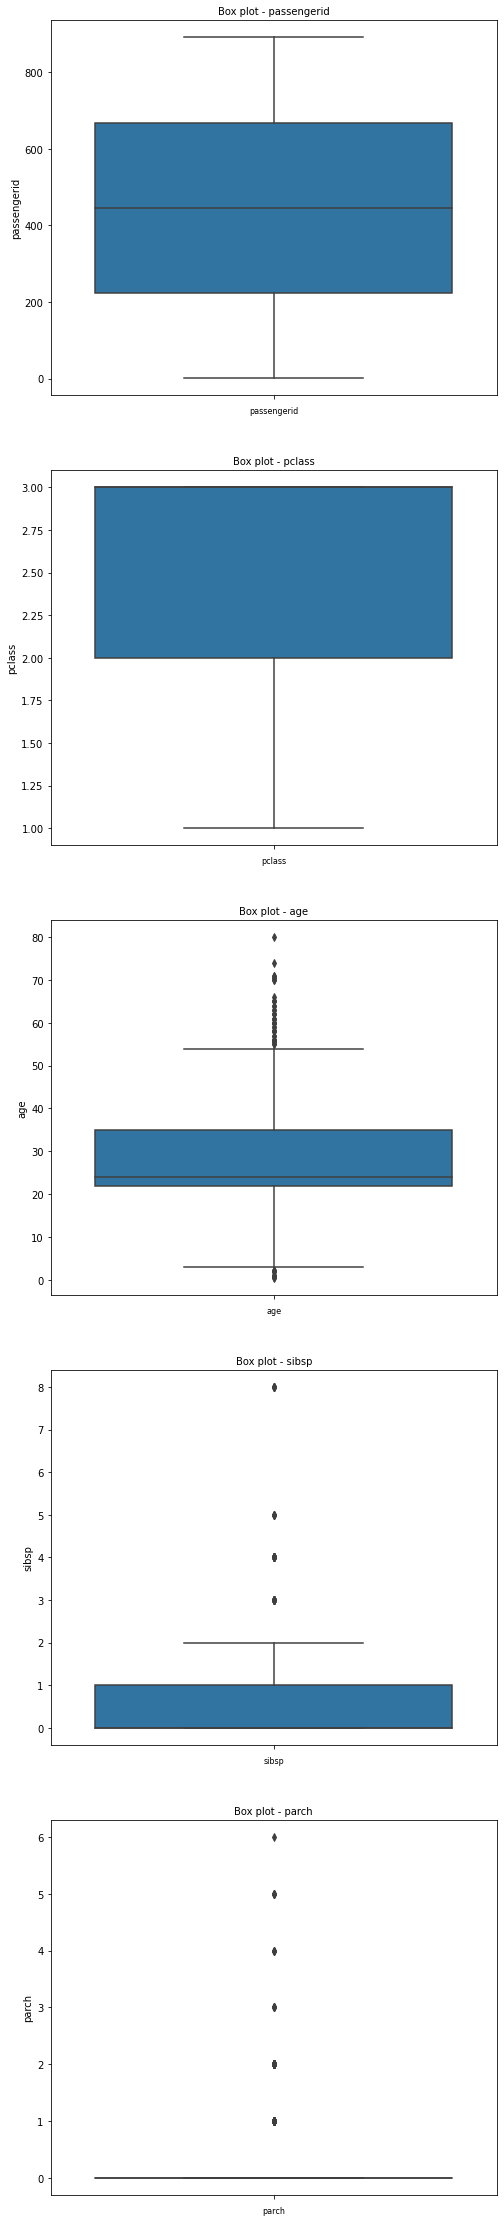

In [29]:
# checking for outliers
# lets check for outliers
column_names = ['passengerid', 'pclass', 'age', 'sibsp', 'parch']

fig, ax = plt.subplots(len(column_names), figsize=(8,40))

for i, col_val in enumerate(column_names):

    sns.boxplot(y=traindf[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

# **6. Analysis**

### Numerical variables

**Measures of central tendency**

In [30]:
# lets get a list of our numerical columns
numerical = list(traindf.select_dtypes(include = ['integer',  'float']).columns)
numerical

['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch']

In [31]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, traindf):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {traindf[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {traindf[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {traindf[column].mode()}")

In [32]:
# Mean
MeasureCentral('mean', numerical, traindf)

passengerid column mean = 446.0
survived column mean = 0.38245219347581555
pclass column mean = 2.3115860517435323
age column mean = 28.518751406074237
sibsp column mean = 0.5241844769403825
parch column mean = 0.38245219347581555


In [33]:
# Median
MeasureCentral('median', numerical, traindf)

passengerid column median = 446.0
survived column median = 0.0
pclass column median = 3.0
age column median = 24.0
sibsp column median = 0.0
parch column median = 0.0


**Measures of dispersion**

In [34]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, traindf):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {traindf[column].max() - traindf[column].min()}")
    elif measure == 'IQR':
      Q1 = traindf[column].quantile(0.25)
      Q3 = traindf[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {traindf[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {traindf[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {traindf[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {traindf[column].kurt()}")

In [35]:
# Range
MeasureDistribution('range', numerical, traindf)

passengerid column range = 890
survived column range = 1
pclass column range = 2
age column range = 79.58
sibsp column range = 8
parch column range = 6


In [36]:
# variance
MeasureDistribution('var', numerical, traindf)

passengerid column variance = 66048.06081081081
survived column variance = 0.23644848447998187
pclass column variance = 0.6967237203457705
age column variance = 173.25982197529387
sibsp column variance = 1.2181644524164283
parch column variance = 0.6508628988943893


In [37]:
# kurtosis
MeasureDistribution('kurt', numerical, traindf)

passengerid column kurt = -1.197156421963046
survived column kurt = -1.7691794454365986
pclass column kurt = -1.2694374832322646
age column kurt = 0.9378623280106138
sibsp column kurt = 17.838972378994782
parch column kurt = 9.750591705579096


# **7. Implementing the solution**

## Modelling: KNN

      Knn is used for both classification and regresion problems.
    

### Good practice

      KNN algorithm can be imprived via applying dimensionality reduction techniques or rescaling data prior to applying KNN.
      High multicollinearity can lead to a low performing model.

In [38]:
correlations = traindf.corr()

In [39]:
# checking for muticloonearity via vif
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,passengerid,survived,pclass,age,sibsp,parch
passengerid,1.005383,0.020671,0.034207,-0.009533,0.065891,-0.029412
survived,0.020671,1.187837,0.478644,0.243997,0.105959,-0.113131
pclass,0.034207,0.478644,1.337939,0.504932,0.023600,0.005737
age,-0.009533,0.243997,0.504932,1.256288,0.228526,0.069969
sibsp,0.065891,0.105959,0.023600,0.228526,1.264976,-0.498285
parch,-0.029412,-0.113131,0.005737,0.069969,-0.498285,1.226598


        VIFs < 5; we thus dont drop any variables

In [40]:
# Splitting our dataset into its attributes and labels
# ---
# The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.
# ---
# 
X = traindf[['passengerid', 'pclass', 'age', 'sibsp', 'parch']].values
y = traindf['survived'].values
X

array([[  1.,   3.,  22.,   1.,   0.],
       [  2.,   1.,  38.,   1.,   0.],
       [  3.,   3.,  26.,   0.,   0.],
       ...,
       [889.,   3.,  24.,   1.,   2.],
       [890.,   1.,  26.,   0.,   0.],
       [891.,   3.,  32.,   0.,   0.]])

In [41]:
# applying dimensionality reduction techniques
# pca
# Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
# Normalization
# PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
# Applying PCA
# It is only a matter of three lines of code to perform PCA using Python's Scikit-Learn library. 
# The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# Let's take a look at the following code. In the code above, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [44]:
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 

explained_variance

array([0.33098415, 0.2343427 , 0.19903947, 0.12416793, 0.11146575])

In [45]:
# Using 2 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [46]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [47]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only two features
# gives as an accuracy score of 66%

[[88 17]
 [43 30]]
Accuracy 0.6629213483146067


### a)Splitting data (80-20)

In [48]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# a
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)


In [50]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

[[71 34]
 [32 41]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       105
           1       0.55      0.56      0.55        73

    accuracy                           0.63       178
   macro avg       0.62      0.62      0.62       178
weighted avg       0.63      0.63      0.63       178

model accuracy 0.6292134831460674


### b) Splitting data (70-30)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [52]:
# Normalization
# PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# a
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)


In [55]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

[[121  36]
 [ 62  48]]
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       157
           1       0.57      0.44      0.49       110

    accuracy                           0.63       267
   macro avg       0.62      0.60      0.60       267
weighted avg       0.62      0.63      0.62       267

model accuracy 0.6329588014981273


### c) Splitting the data (60-40)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [57]:
# Normalization
# PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# a
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)


In [60]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

[[163  53]
 [ 71  69]]
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       216
           1       0.57      0.49      0.53       140

    accuracy                           0.65       356
   macro avg       0.63      0.62      0.63       356
weighted avg       0.65      0.65      0.65       356

model accuracy 0.651685393258427


# **8. Conclusion**
      Splitting the dataset 80-20 had a model accuracy of 62%
      Splitting the dataset 70-30 had a model accuracy of 63%
      Splitting the dataset 60-40 had a model accuracy of 65%
        Hence our best performing model is the model that was split 60-40

# **9) Follow up questions**

### a). Did we have the right data?
      Yes.

### b). Do we need other data to answer our question?
      No.

### c). Did we have the right question?
      Yes.